##### PAIR PROGRAMMING - REGRESIÓN LINEAL 6

In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

In [3]:
df = pd.read_csv('datos/pokePd_normalizado.csv', index_col = 0)
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_BOX
0,Bulbasaur,"['Grass', 'Poison']",318,45,49,49,65,65,45,14.989229
1,Ivysaur,"['Grass', 'Poison']",405,60,62,63,80,80,60,18.167339
2,Venusaur,"['Grass', 'Poison']",525,80,82,83,100,100,80,21.952639
3,Venusaur Mega Venusaur,"['Grass', 'Poison']",625,80,100,123,122,120,80,21.952639
4,Charmander,['Fire'],309,39,52,43,60,50,65,19.154975


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

1. Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [6]:
# seleccionamos las variables numéricas de nuestro dataset

numericas = df.select_dtypes(include= np.number)

In [8]:
# eliminamos las columnas de la variable respuesta

numericas.drop(['Speed', 'Speed_BOX'], axis=1, inplace=True)

In [9]:
numericas.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,318,45,49,49,65,65
1,405,60,62,63,80,80
2,525,80,82,83,100,100
3,625,80,100,123,122,120
4,309,39,52,43,60,50


In [10]:
# construimos el modelo de escalador
robust = RobustScaler()

In [11]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [12]:
# transformamos los datos
X_robust = robust.transform(numericas)

In [13]:
numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)

numericas_robust.head(2)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,-0.761111,-0.733333,-0.611111,-0.525,0.000000,-0.125
1,-0.277778,-0.233333,-0.322222,-0.175,0.333333,0.250


In [14]:
# mediante el for loop  iteramos por todas las columnas para que nos devuelva la media y la desviación típica
# vemos que los valores de la media son m´ças cercanos a 0 y los de la std a 1

for columna in numericas_robust.columns:
    
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')

    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')

    print("-------------------------------------------------------------")

La media de la columna Total es:  -0.09561573178594451
La desviación estándar de la columna Total es: 0.6754196206347044
-------------------------------------------------------------
La media de la columna HP es:  0.09019987105093481
La desviación estándar de la columna HP es: 0.8795690020507754
-------------------------------------------------------------
La media de la columna Attack es:  0.08353750268643882
La desviación estándar de la columna Attack es: 0.71927939435209
-------------------------------------------------------------
La media de la columna Defense es:  0.11353965183752417
La desviación estándar de la columna Defense es: 0.7809036112245173
-------------------------------------------------------------
La media de la columna Sp.Atk es:  0.17059961315280447
La desviación estándar de la columna Sp.Atk es: 0.7243735137402879
-------------------------------------------------------------
La media de la columna Sp.Def es:  0.05166827852998066
La desviación estándar de la colum

In [16]:
# con el describe lo vemos de manera más visual

numericas_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,1034.0,-0.095616,0.675420,-1.555556,-0.694444,0.0,0.305556,3.722222
HP,1034.0,0.090200,0.879569,-2.200000,-0.566667,0.0,0.433333,6.266667
Attack,1034.0,0.083538,0.719279,-1.588889,-0.477778,0.0,0.522222,2.522222
Defense,1034.0,0.113540,0.780904,-1.625000,-0.500000,0.0,0.500000,4.500000
Sp.Atk,1034.0,0.170600,0.724374,-1.222222,-0.333333,0.0,0.666667,2.866667
Sp.Def,1034.0,0.051668,0.700431,-1.250000,-0.500000,0.0,0.500000,4.500000


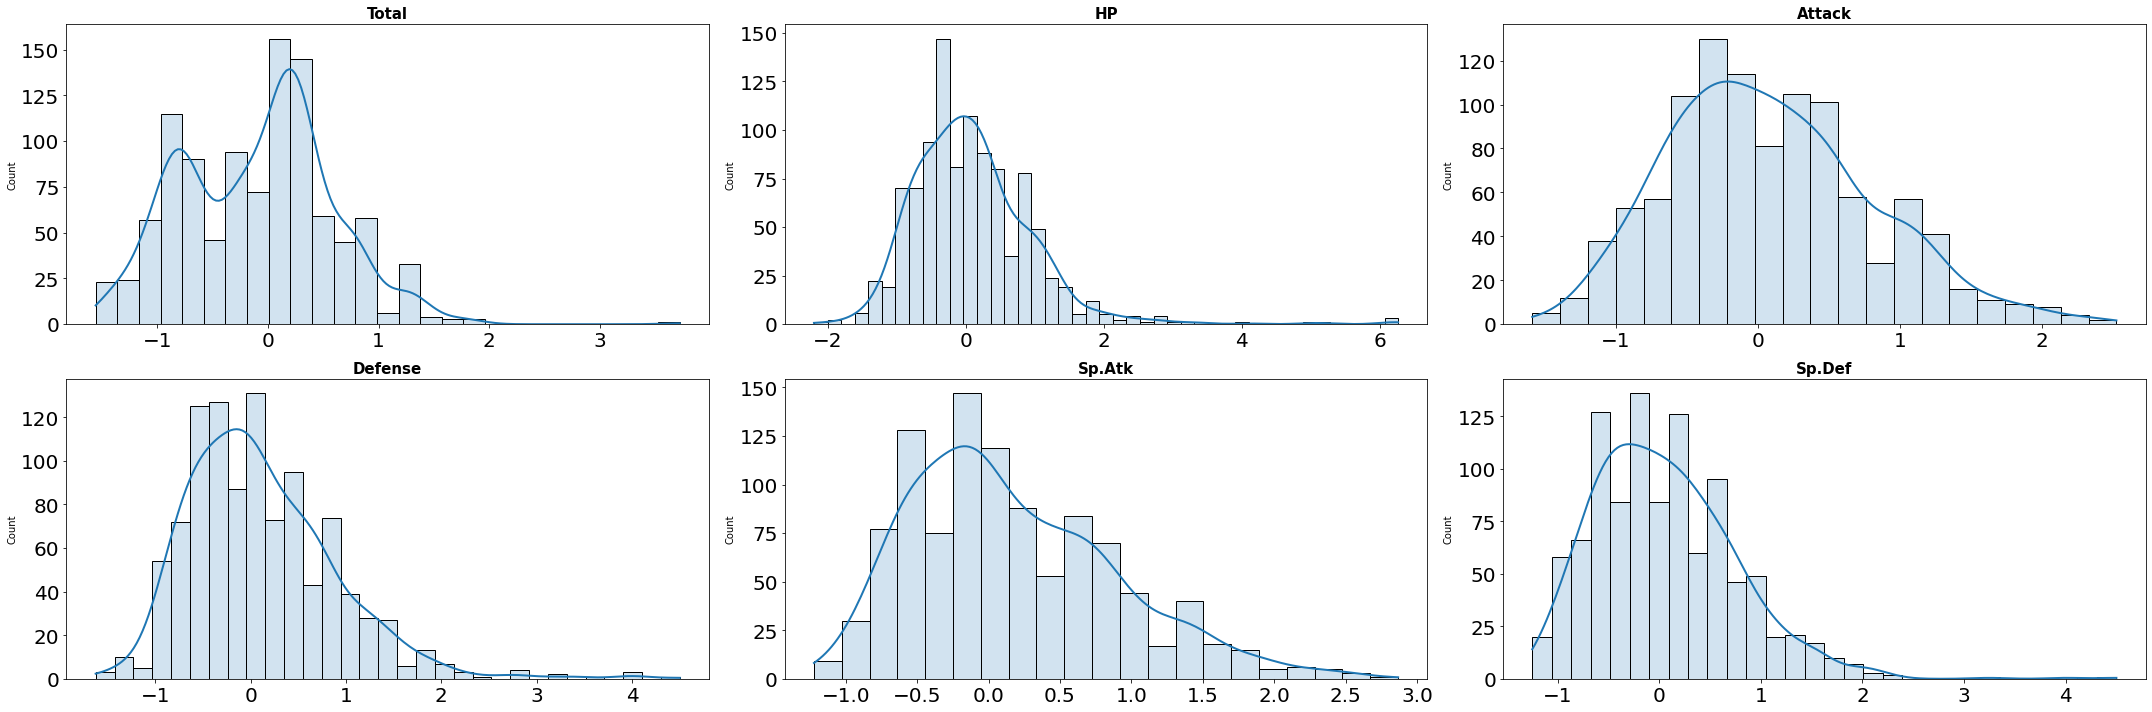

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat
for i, colum in enumerate(columnas_robust): 
    sns.histplot(data = numericas_robust,
                 x = colum,
                 kde = True,
                 line_kws = {"linewidth": 2},
                 alpha = 0.2,
                 ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    fig.tight_layout()
    
    # fig.delaxes(axes[-1])
    # fig.delaxes(axes[-2])
    # fig.delaxes(axes[-3])

Hemos decidido aplicar esta estandarización porque tenemos outliers en nuestras variables que no se han tratado previamente. Con el método RobustScaler transformamos nuestras variables restando la mediana y dividiéndola por el rango intercuartílico. El rango de cada variable después de aplicar el método será mayor que el del MinMaxScaler.
Con el StandardScaler tambíen conseguimos la estnadarización de todas nuestras variables predictoras pero en este caso no se tienen en cuenta los valores atípicos.

In [20]:
numericas_robust.head()

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def
0,-0.761111,-0.733333,-0.611111,-0.525,0.000000,-0.125
1,-0.277778,-0.233333,-0.322222,-0.175,0.333333,0.250
2,0.388889,0.433333,0.122222,0.325,0.777778,0.750
3,0.944444,0.433333,0.522222,1.325,1.266667,1.250
4,-0.811111,-0.933333,-0.544444,-0.675,-0.111111,-0.500


In [21]:
df[numericas_robust.columns] = numericas_robust

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Speed_BOX
0,Bulbasaur,"['Grass', 'Poison']",-0.761111,-0.733333,-0.611111,-0.525,0.000000,-0.125,45,14.989229
1,Ivysaur,"['Grass', 'Poison']",-0.277778,-0.233333,-0.322222,-0.175,0.333333,0.250,60,18.167339


In [23]:
df.drop('Speed', axis=1, inplace=True)

In [24]:
df.head(2)

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed_BOX
0,Bulbasaur,"['Grass', 'Poison']",-0.761111,-0.733333,-0.611111,-0.525,0.000000,-0.125,14.989229
1,Ivysaur,"['Grass', 'Poison']",-0.277778,-0.233333,-0.322222,-0.175,0.333333,0.250,18.167339


2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [25]:
df.to_csv('datos/pokePd_estandarizado.csv')